In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from latent_maximum_model import LatentMaximumDataGenerator, LatentMaximumModel

## Data Generating Process

$$y = \alpha (s - \vec x \beta)^2 + \vec x' \beta' + \epsilon $$

where $y$ is observed, $s, \vec x, \vec x'$ are features known from the data. The parameter $\alpha < 0$, so $E[y]$ is a concave function of $s$.

The quantity of interest is $\vec x \beta$, since we want to find, given the values of the features $\vec x, \vec x'$, the value of $s$ which maximizes $y$. We use the shorthand:

$$ \mu = \vec x \beta $$

In [2]:
lmg = LatentMaximumDataGenerator(residual_std=100.0)
df = lmg.generate(10000)

Text(0, 0.5, '$y$')

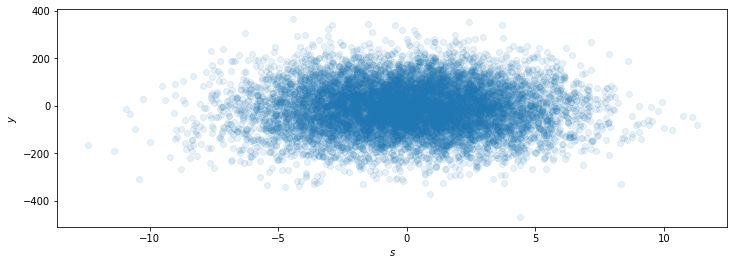

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(df['s'], df['y'], alpha=0.1)
ax.set_xlabel('$s$')
ax.set_ylabel('$y$')

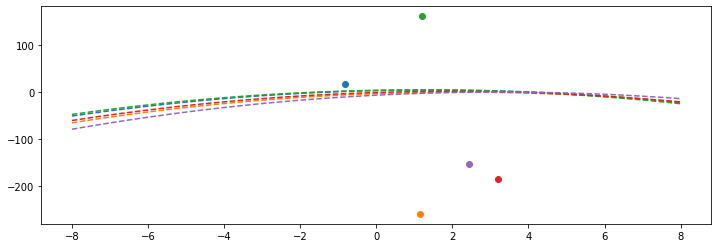

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))

t = np.linspace(-8, 8, num=50)

for _, row in df[:5].iterrows():
    f = lambda x: lmg.a * (x - row['mu'])**2 + row['A']
    ax.plot(t, f(t), linestyle='--')
    ax.scatter(row['s'], row['y'])

We fit the model to our data by taking our estimate of $y$ as:

$$ \hat y = \alpha (s - \vec x \beta)^2 + \vec x' \beta' $$

Then minimizing the MSE:

$$ MSE = \frac{1}{N} \sum_i (y_i - \hat y_i)^2 $$

The partial derivatives in question are:

$$ \frac{\partial MSE}{\partial \alpha} = \frac{-2}{N} ...$$

In [5]:
lmm = LatentMaximumModel(rtol=0.00001)

In [6]:
x_latent = df[['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9']]
x_additive = df[['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']]

lmm.fit(
    x = df['s'],
    x_latent = x_latent,
    x_additive = x_additive,
    y = df['y']
)

In [7]:
# Actual values
lmg.latent_coefs

array([ 0.79750207,  1.72017797,  1.71408084, -0.29031155, -0.82689572,
        0.61244519, -0.13231182,  0.75249036,  0.2342943 , -0.5162732 ])

In [8]:
# Recovered from the model
lmm.latent_coefs

L0    0.789335
L1    1.670468
L2    1.727750
L3   -0.215992
L4   -1.000436
L5    0.658202
L6    0.105957
L7    0.633895
L8    0.026074
L9   -0.686326
dtype: float64

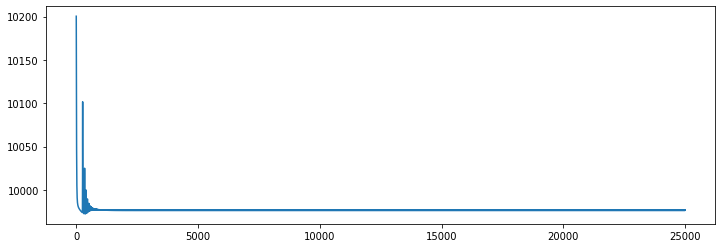

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(lmm.losses)

Text(0, 0.5, 'Esitmated Maximum')

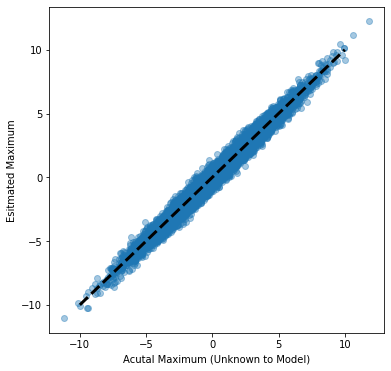

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(df['mu'], lmm.predict_mu(x_latent), alpha=0.4)
ax.plot(
    np.linspace(-10, 10),
    np.linspace(-10, 10),
    linewidth=3, 
    linestyle='--', 
    color='black'
)

ax.set_xlabel("Acutal Maximum (Unknown to Model)")
ax.set_ylabel("Esitmated Maximum")